In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [2]:
# Načtení datasetu MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
model = Sequential([
  Flatten(input_shape=(28, 28)), # převod 2D obrázku na 1D pole
  Dense(128, activation='relu'), # skrytá vrstva
  Dense(10, activation='softmax') # výstupní vrstva
])


model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Metal device set to: Apple M1 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2023-06-15 22:42:34.607123: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-15 22:42:34.607279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.fit(train_images, train_labels_one_hot, epochs=5)

Epoch 1/5


2023-06-15 22:44:20.243167: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-15 22:44:20.405332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.2592 - accuracy: 0.9255
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1126 - accuracy: 0.9663
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0786 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0585 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0450 - accuracy: 0.9862


In [11]:
# insample
train_loss, train_acc = model.evaluate(train_images, train_labels_one_hot)
print('Trénovací přesnost:', train_acc)

  24/1875 [..............................] - ETA: 12s - loss: 0.0394 - accuracy: 0.9909

2023-06-15 22:45:39.681182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0303 - accuracy: 0.9911
Trénovací přesnost: 0.9910833239555359


In [12]:
# outof sample
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot)
print('Testovací přesnost:', test_acc)

  8/313 [..............................] - ETA: 2s - loss: 0.0365 - accuracy: 0.9961 

2023-06-15 22:46:11.315174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.0730 - accuracy: 0.9774
Testovací přesnost: 0.977400004863739


In [13]:
# Predikce
predictions = model.predict(test_images)

 96/313 [========>.....................] - ETA: 0s

2023-06-15 22:46:29.849870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [14]:
# správně a špatně klasifikovaných příkladů
correct_indices = np.nonzero(np.argmax(predictions, axis=1) == test_labels)[0]
incorrect_indices = np.nonzero(np.argmax(predictions, axis=1) != test_labels)[0]


První správně klasifikovaný příklad:


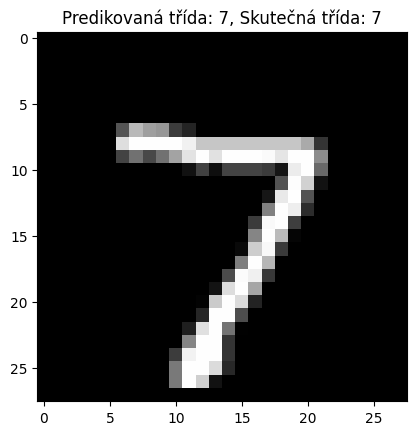

In [15]:
print("\nPrvní správně klasifikovaný příklad:")
plt.figure()
plt.imshow(test_images[correct_indices[0]], cmap="gray")
plt.title("Predikovaná třída: {}, Skutečná třída: {}".format(np.argmax(predictions[correct_indices[0]]), test_labels[correct_indices[0]]))
plt.show()


První špatně klasifikovaný příklad:


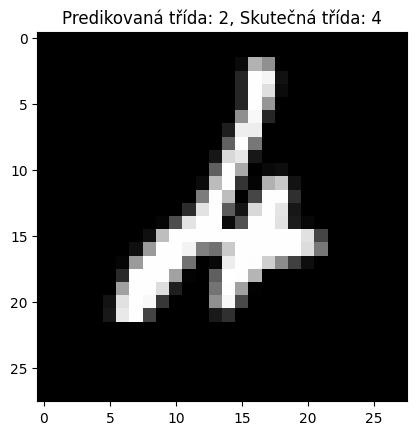

In [16]:
print("\nPrvní špatně klasifikovaný příklad:")
plt.figure()
plt.imshow(test_images[incorrect_indices[0]], cmap="gray")
plt.title("Predikovaná třída: {}, Skutečná třída: {}".format(np.argmax(predictions[incorrect_indices[0]]), test_labels[incorrect_indices[0]]))
plt.show()


# CNN

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [18]:
# Načtení datasetu MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


train_images = train_images / 255.0
test_images = test_images / 255.0


train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [19]:
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # konvoluční vrstva
  MaxPooling2D((2, 2)), # pooling vrstva
  Flatten(), # převod 2D obrázku na 1D pole
  Dense(128, activation='relu'), # skrytá vrstva
  Dense(10, activation='softmax') # výstupní vrstva
])


model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [20]:
model.fit(train_images, train_labels_one_hot, epochs=5)

Epoch 1/5


2023-06-15 22:50:24.003818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 17s 8ms/step - loss: 0.1485 - accuracy: 0.9556
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0508 - accuracy: 0.9844
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0325 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0215 - accuracy: 0.9931
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0147 - accuracy: 0.9950


In [21]:
# na trénovacích datech
train_loss, train_acc = model.evaluate(train_images, train_labels_one_hot)
print('Trénovací přesnost:', train_acc)

# na testovacích datech
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot)
print('Testovací přesnost:', test_acc)

  14/1875 [..............................] - ETA: 14s - loss: 0.0063 - accuracy: 1.0000

2023-06-15 22:52:03.278612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0149 - accuracy: 0.9950
Trénovací přesnost: 0.9949833154678345
 14/313 [>.............................] - ETA: 2s - loss: 0.0365 - accuracy: 0.9866

2023-06-15 22:52:16.089869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.0499 - accuracy: 0.9839
Testovací přesnost: 0.9839000105857849


In [22]:
# Predikce
predictions = model.predict(test_images)

# Hledání správně a špatně klasifikovaných příkladů
correct_indices = np.nonzero(np.argmax(predictions, axis=1) == test_labels)[0]
incorrect_indices = np.nonzero(np.argmax(predictions, axis=1) != test_labels)[0]

 77/313 [======>.......................] - ETA: 0s

2023-06-15 22:52:56.724837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step



První správně klasifikovaný příklad:


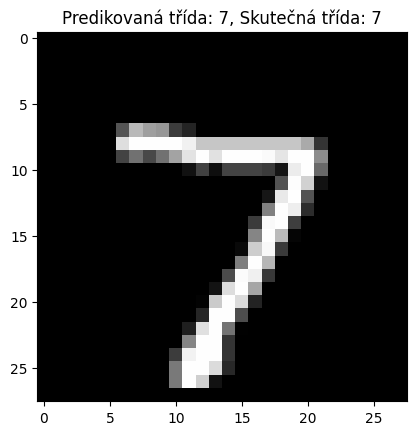


První špatně klasifikovaný příklad:


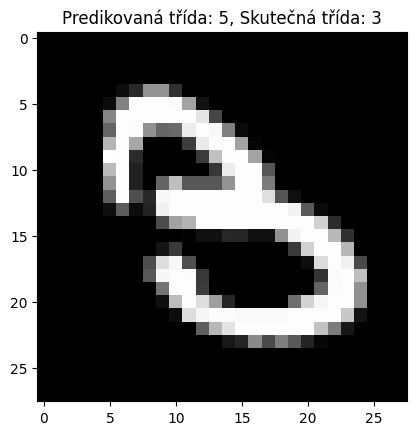

In [23]:

print("\nPrvní správně klasifikovaný příklad:")
plt.figure()
plt.imshow(test_images[correct_indices[0]], cmap="gray")
plt.title("Predikovaná třída: {}, Skutečná třída: {}".format(np.argmax(predictions[correct_indices[0]]), test_labels[correct_indices[0]]))
plt.show()


print("\nPrvní špatně klasifikovaný příklad:")
plt.figure()
plt.imshow(test_images[incorrect_indices[0]].squeeze(), cmap="gray") # .squeeze() je použito k odstranění nepotřebné dimenze
plt.title("Predikovaná třída: {}, Skutečná třída: {}".format(np.argmax(predictions[incorrect_indices[0]]), test_labels[incorrect_indices[0]]))
plt.show()



# CNN s více vrstvama

In [24]:
# Import knihoven
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


train_images = train_images / 255.0
test_images = test_images / 255.0


train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Model
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 1. konvoluční vrstva
  MaxPooling2D((2, 2)), # 1. pooling vrstva
  Conv2D(64, (3, 3), activation='relu'), # 2. konvoluční vrstva
  MaxPooling2D((2, 2)), # 2. pooling vrstva
  Conv2D(64, (3, 3), activation='relu'), # 3. konvoluční vrstva
  MaxPooling2D((2, 2)), # 3. pooling vrstva
  Flatten(), # převod 2D obrázku na 1D pole
  Dense(64, activation='relu'), # skrytá vrstva
  Dense(10, activation='softmax') # výstupní vrstva
])

# Kompilace
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 64)        

In [25]:

# Trénování
model.fit(train_images, train_labels_one_hot, epochs=5)



Epoch 1/5


2023-06-15 22:58:19.570152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 19s 9ms/step - loss: 0.2125 - accuracy: 0.9333
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0702 - accuracy: 0.9786
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0510 - accuracy: 0.9850
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0415 - accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0318 - accuracy: 0.9901


In [26]:

# Trénovací
train_loss, train_acc = model.evaluate(train_images, train_labels_one_hot)
print('Trénovací přesnost:', train_acc)

# Testovací
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot)
print('Testovací přesnost:', test_acc)


  15/1875 [..............................] - ETA: 14s - loss: 0.0114 - accuracy: 0.9979

2023-06-15 22:59:57.640463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0234 - accuracy: 0.9931
Trénovací přesnost: 0.9931166768074036
 14/313 [>.............................] - ETA: 2s - loss: 0.0315 - accuracy: 0.9933

2023-06-15 23:00:11.150791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 0.0484 - accuracy: 0.9868
Testovací přesnost: 0.9868000149726868


In [27]:

# Predikce
predictions = model.predict(test_images)

# správně a špatně klasifikovaných příkladů
correct_indices = np.nonzero(np.argmax(predictions, axis=1) == test_labels)[0]
incorrect_indices = np.nonzero(np.argmax(predictions, axis=1) != test_labels)[0]



 71/313 [=====>........................] - ETA: 0s

2023-06-15 23:00:27.941726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step



První správně klasifikovaný příklad:


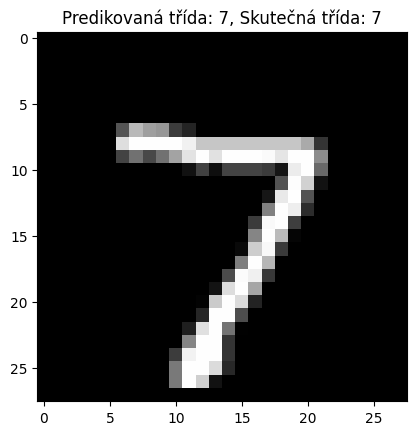


První špatně klasifikovaný příklad:


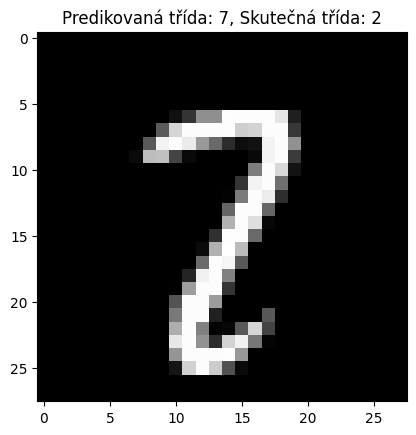

In [28]:

print("\nPrvní správně klasifikovaný příklad:")
plt.figure()
plt.imshow(test_images[correct_indices[0]].squeeze(), cmap="gray") # .squeeze() je použito k odstranění nepotřebné dimenze
plt.title("Predikovaná třída: {}, Skutečná třída: {}".format(np.argmax(predictions[correct_indices[0]]), test_labels[correct_indices[0]]))
plt.show()


print("\nPrvní špatně klasifikovaný příklad:")
plt.figure()
plt.imshow(test_images[incorrect_indices[0]].squeeze(), cmap="gray") # .squeeze() je použito k odstranění nepotřebné dimenze
plt.title("Predikovaná třída: {}, Skutečná třída: {}".format(np.argmax(predictions[incorrect_indices[0]]), test_labels[incorrect_indices[0]]))
plt.show()

In [ ]:
model.save('model.h5')